# Lab 2: Flexure of the oceanic lithosphere under island chains 

In this lab, we will solve the plate flexure equation for an ocean island load numerically using finite-differences. We will compare the model results to read data from Hawai'i and estimate the effective elastic thickness of the Pacific plate underneath the islands.

Learning objectives:

* Build on the theorical knowledge acquired in [Lecture 2](https://www.leouieda.com/envs398/slides/2-isostasy/).
* Learn how to apply the finite-difference method to solve partial differential equations.
* Gain a practical understanding of plate flexure.


## General instructions

This is a [Jupyter notebook](https://jupyter.org/) running in [Jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/). The notebook is a programming environment that mixes code (the parts with `[1]: ` or similar next to them) and formatted text/images/equations with [Markdown](https://www.markdownguide.org/basic-syntax) (like this part right here).

Quick start guide:

* **Edit** any cell (blocks of code or text) by double clicking on it.
* **Execute** a code or Markdown cell by typing `Shift + Enter` after selecting it.
* The current active cell is the one with a **blue bar next to it**.
* You can run cells **in any order** as long as the code sequence makes sense (it's best to go top-to-bottom, though).
* To copy any file to the current directory, drag and drop it to the file browser on the left side.
* Notebook files have the extension `.ipynb`.

## The plate flexure equation

The equation describing the flexure ($w$) of an elastic plate subject to a vertical load is:

$ D\dfrac{\partial^4 w}{\partial x^4} = q(x) - (\rho_m - \rho_w) g w $

in which $w$ is the flexure (how much the plate bends up or down), $x$ is the position, $D$ is the flexural rigidity of the plate, $rho_c$ and $rho_m$ are the crust and mantle densities, $g$ is gravity (for these purposes, assume $9.8\ m/s^2$), and $q(x)$ is a force density applied by the load on the plate (the weight of the topography). The term $(\rho_m - \rho_w) g w$ is the restoring hydrostatic force (buoyancy) from replacing mantle material at depth with water on top because of the flexure.

One of the the assumptions we're taking here is that the lithosphere has a density $\rho_m$ same as the underlying mantle. So we're effectively disregarding the crustal part of the lithosphere. 

The flexural rigidity can be described in terms of the plate's elastic parameters:

$D = \dfrac{E T_e^3}{12(1 - \nu^2)}$

$E$ is [Young's modulus](https://en.wikipedia.org/wiki/Young's_modulus), $\nu$ is [Poisson's ratio](https://en.wikipedia.org/wiki/Poisson's_ratio), and $T_e$ is the *effective elastic thickness* (the reference books use $h$ for this but $T_e$ is very common in the literature).

The **load force per unit area** $q(x)$ is the weight of the load applied on the lithosphere. For a load of height $h$ and density $\rho_c$, the weight per unit area is (negative because the force is applied downwards):

$q(x) = -g \rho_c h(x)$

**Note:** For a detailed derivation of these equations and analytical solutions, see "Chapter 3: Elasticity and Flexure" of "Geodynamics" by Turcotte and Schubert.

## Boundary conditions

We need to consider the appropriate boundary conditions for the loading of the oceanic lithosphere by an island chain. If we assume that the load is applied at the middle of the plate, we can consider the boundaries as stable lithosphere under no load. In that case, we don't expect to see any flexure at the boundaries:

$w(x=0) = 0$ and $w(x=x_{max}) = 0$

We also need to imposed conditions on the derivative of $w$. If there is no flexure, we can also assume that the first derivative of flexure is zero (the plate approaches the boundaries horizontally, not at an angle):

$\dfrac{\partial w}{\partial x}(x=0) = 0$ and $\dfrac{\partial w}{\partial x}(x=x_{max}) = 0$

## Finite-difference solution

The finite-difference method is a way of calculating an approximate solution to partial differential equations. Numerical solutions allows us to solve problems for complex sources and mediums for which analytical solutions might not have been found.

Remembering our calculus, the derivative is defined as:

$\dfrac{\partial w}{\partial x}(x) = \lim_{\Delta x \to 0} \dfrac{w(x + \Delta x) - w(x)}{\Delta x}$

The main concept for finite-differences is approximating the derivative by eliminating the limit above and assuming that $\Delta x$ is sufficiently small:

$\dfrac{\partial w}{\partial x}(x) \approx \dfrac{w(x + \Delta x) - w(x)}{\Delta x}$

The numerical process involves discretizing the continuous value $w(x)$ into evenly spaced points $w_0, w_1, \ldots, w_{N-1}$ with $\Delta x$ spacing between them. In that case, the first derivative between points $w_0$ and $w_1$ can be approximated by:

$\dfrac{\partial w}{\partial x}(x_0) \approx \dfrac{w_1 - w_0}{\Delta x}$

Propagating this to other higher order derivatives: 

![Finite-differences for up to fourth order derivatives.](figures/finite-differences-grid.svg)

With finite-differences, we can calculate the derivative at $x_2$ from values of $w$ in the 5 points around $x_2$.

Using this formulation, the flexure equation in finite-differences form is:

$ 
D \dfrac{w_{i+2} - 4w_{i+1} + 6w_i - 4w_{i-1} + w_{i-2}}{\Delta x^4} = q_i - (\rho_m - \rho_w) g w_i
$

Here, we're using $w_i$ to represent the flexure at an arbitrary node in the grid. Notice that we have discretized the load $q(x)$ at the same locations as well to get $q_i$.

The **boundary conditions** also need to be converted to discrete finite-differences:

$w_0 = 0$ and $w_{N-1} = 0$

$\dfrac{w_1- w_0}{\Delta x} = 0$ and $\dfrac{w_{N-1} - w_{N-2}}{\Delta x} = 0$.

## Solving for $w$

**The flexure $w$ is what we want to calculate so they are the unknowns in this equation.** So we can re-arange the equation above to isolate the $w$ on the left-hand side of the equation and any term not containing $w$ on the other. Also eliminate the division to make our lives easier. 

$ 
D w_{i+2} - 4 D w_{i+1} + \left[6D + \Delta x^4 (\rho_m - \rho_w) g\right] w_i - 4 D w_{i-1} + D w_{i-2} = \Delta x^4 q_i
$

Since we have values of $w$ for multiple values of $i$, we can form an equation system (with the boundary conditions as well):

$
\begin{align*}
  D w_{4} - 4 D w_{3} + \left[6D + \Delta x^4 (\rho_m - \rho_w) g\right] w_2 - 4 D w_{1} + D w_{0} &= \Delta x^4 q_2  \\ 
  D w_{5} - 4 D w_{4} + \left[6D + \Delta x^4 (\rho_m - \rho_w) g\right] w_3 - 4 D w_{2} + D w_{1} &= \Delta x^4 q_3  \\ 
  \vdots & \\
  D w_{i+4} - 4 D w_{i+3} + \left[6D + \Delta x^4 (\rho_m - \rho_w) g\right] w_{i+2} - 4 D w_{i+1} + D w_{i} &= \Delta x^4 q_{i+2}  \\ 
  \vdots & \\
  D w_{N-1} - 4 D w_{N-2} + \left[6D + \Delta x^4 (\rho_m - \rho_w) g\right] w_{N-3} - 4 D w_{N-4} + D w_{N-5} &= \Delta x^4 q_{N-3} \\
  w_0 &= 0  \\
  w_{N-1} &= 0  \\
  w_1 - w_0 &= 0  \\
  w_{N-1} - w_{N-2} &= 0 
\end{align*}
$

With this system, we have $N$ unknowns and $N$ equations ($N-4$ for the flexure equation and $4$ for the boundary conditions). **Solving the system will give us the flexure ($w$) for a given load $q$.**

Another way of writing this equation system is using a matrix notation:

$
\begin{bmatrix}
  D  & -4D & \left[6D + \Delta x^4 (\rho_m - \rho_w) g\right] & -4D & D & 0 & 0 & \ldots & 0 & 0 \\ 
  0 & D  & -4D & \left[6D + \Delta x^4 (\rho_m - \rho_w) g\right] & -4D & D & 0 & \ldots & 0 & 0 \\ 
  \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots  \\
  1 & 0 & 0 & 0 & 0 & 0 & 0 & \ldots & 0 & 0  \\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & \ldots & 0 & 1  \\
  -1 & 1 & 0 & 0 & 0 & 0 & 0 & \ldots & 0 & 0  \\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & \ldots & -1 & 1
 \end{bmatrix}
\begin{bmatrix}
  w_0 \\
  w_1 \\
  w_2 \\
  w_3 \\
  w_4 \\
  w_5 \\
  w_6 \\
  \vdots \\
  w_{N-1} 
 \end{bmatrix}
 =
\begin{bmatrix}
  \Delta x^4 q_2 \\
  \Delta x^4 q_3 \\
  \vdots \\
  0\\
  0\\
  0\\
  0
 \end{bmatrix}
$

$\bar{\bar{A}}\bar{w} = \bar{b}$

Calculating $w$ is now a matter of solving the linear system using matrix $\bar{\bar{A}}$ and the right-hand-side vector $\bar{b}$.

## Import things

As before, the first thing to do is load the Python libraries that we'll be using. We'll group all our imports here at the top to make it easier to see what we're using.

In [1]:
# The base of the entire scientific Python stack
import numpy as np
# For making plots and figures
import matplotlib.pyplot as plt
# To load and operate on data tables
import pandas as pd
# Scipy defines a bunch of scientific goodness on top of numpy
# scipy.optimize is the module for function minimization
import scipy.optimize

## Setup a simplified model first

To test our implementation, let's try setting up a model with a load in a single point in the middle of the grid. First, we have to make the grid (array of $x$ values and associated $\Delta x$).

In [2]:
number_of_nodes = 200
profile_length = 2500 # km
x = np.linspace(0, profile_length, number_of_nodes)
delta_x = x[1] - x[0]
print(delta_x, "km")

12.56281407035176 km


Now define the physical properties of the plate and the surrounding medium:

In [3]:
gravity = 9.8e-3 # km/s²
density_contrast = 3.3e12 - 1.0e12 # kg/km³
effective_elastic_thickness = 80 # km
young_modulus = 70e12  # kg/(s²km)
poisson_modulus = 0.25  # dimensionless
flexural_rigidity = young_modulus * effective_elastic_thickness**3 / (12 * (1 - poisson_modulus**2))  # kg.km²/s²

Now we can define the load vector $q$. It will have the same number of elements as `x` and we'll place a weight in the middle of it.

In [4]:
load_height = 5 # km
load_density = 2.8e12 # kg/km³
# Make an array with the same size as x but filled with zeros
load = np.zeros_like(x)
# Use the equation for the force per unit area given above
load[number_of_nodes // 2] = - gravity * load_density * load_height  # kg/(km.s²)

----

### Your turn 

Plot the load vector using matplotlib in the cell below:

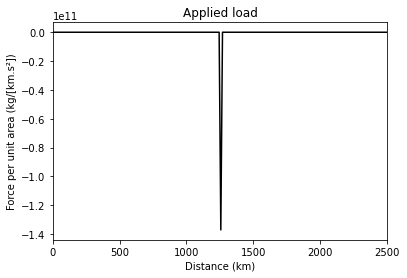

In [5]:
plt.figure()
plt.title("Applied load")
# Complete with your own code below
plt.plot(x, load, "-k")
plt.xlabel("Distance (km)")
plt.ylabel("Force per unit area (kg/[km.s²])")
plt.xlim(x.min(), x.max())
plt.show()

----

Now that we have a load and physical properties of the medium, let's define the equation system (the $\bar{\bar{A}}$ matrix and $\bar{b}$ vector). Let's start with the right-hand-side of the equation.

In [6]:
# Start with an empty array of the right size
right_hand_side = np.empty(number_of_nodes)

# Populate the part for the flexure equation. 
# The range function generates numbers between the given range in increments of 1.
# Leave the last 4 for later because they are the boundary conditions.
for i in range(0, number_of_nodes - 4):
    # Taken straight from the equations above
    right_hand_side[i] = delta_x**4 * load[i + 2]
    
# Now add the boundary conditions. 
# Remember that in Python we can index arrays backwards (starting from -1).
right_hand_side[-4 : ] = 0

----

### Your turn

Fill in the code below to create the $\bar{\bar{A}}$ matrix. It will be very similar to the code above.

In [7]:
# Fill in the shape of the matrix = (number of rows, number of columns)
eq_system = np.zeros((number_of_nodes, number_of_nodes))

# Populate the flexure part of the equation
for i in range(0, number_of_nodes - 4):
    eq_system[i, i] = flexural_rigidity
    eq_system[i, i + 1] = -4*flexural_rigidity
    eq_system[i, i + 2] = 6*flexural_rigidity + delta_x**4 * density_contrast * gravity
    eq_system[i, i + 3] = -4*flexural_rigidity
    eq_system[i, i + 4] = flexural_rigidity
    
# Add the boundary conditions
eq_system[-4, 0] = 1
eq_system[-3, -1] = 1
eq_system[-2, 0] = -1
eq_system[-2, 1] = 1
eq_system[-1, -2] = -1
eq_system[-1, -1] = 1

To check that your matrix is correct, let's estimate the flexure and compare it with a saved solution that I generated.

In [8]:
flexure = np.linalg.solve(eq_system, right_hand_side)

Make a plot of the estimated flexure and compare with the saved figure below.

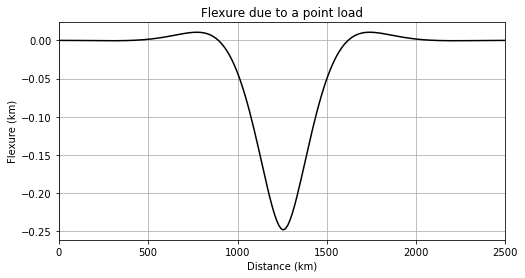

In [9]:
plt.figure(figsize=(8, 4))
# Fill in with your own code
plt.title("Flexure due to a point load")
plt.plot(x, flexure, "-k")
plt.xlim(x.min(), x.max())
plt.grid()
plt.xlabel("Distance (km)")
plt.ylabel("Flexure (km)")
plt.show()

#### **Reference figure**

![Flexure of a point load.](figures/flexure-of-a-point-load.png)

----

## Flexure of Hawai'i

Now we can try to model the flexure of the lithosphere in Hawai'i due to the load of the islands. 

### Load the data

First, let's load the profile data from the file `hawaii-profile.csv` (if downloading the data, put in a `data` folder along side this notebook).

In [10]:
hawaii = pd.read_csv("data/hawaii-profile.csv")
hawaii

,latitude,longitude,distance_km,topography_km,disturbance_mgal
0,13.000000,-165.000000,0.000000,-4.161000,23.008098
1,13.082915,-164.929648,12.070042,-4.747907,21.180807
2,13.165829,-164.859296,24.140085,-5.452608,18.099661
3,13.248744,-164.788945,36.210127,-5.581402,14.372280
4,13.331658,-164.718593,48.280170,-5.438978,10.606283
...,...,...,...,...,...
195,29.168342,-151.281407,2353.658266,-5.539440,-0.359882
196,29.251256,-151.211055,2365.728309,-5.481472,-0.993508
197,29.334171,-151.140704,2377.798351,-5.503901,-0.858798
198,29.417085,-151.070352,2389.868394,-5.467104,-1.044911


This is a `pandas.DataFrame`. You can access the individual columns of data like so:

In [11]:
print(hawaii.distance_km)

0         0.000000
1        12.070042
2        24.140085
3        36.210127
4        48.280170
          ...     
195    2353.658266
196    2365.728309
197    2377.798351
198    2389.868394
199    2401.938436
Name: distance_km, Length: 200, dtype: float64


----

### Your turn

Make a plot of the bathymetry profile in the cell below.

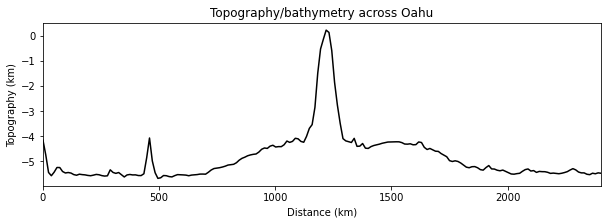

In [12]:
plt.figure(figsize=(10, 3))
# Fill in with your own code
plt.plot(hawaii.distance_km, hawaii.topography_km, "-k")
plt.xlim(hawaii.distance_km.min(), hawaii.distance_km.max())
plt.xlabel("Distance (km)")
plt.ylabel("Topography (km)")
plt.title("Topography/bathymetry across Oahu")
plt.show()

----

### Remove the thermal swell

We can see from the bathymetry profile that there is a long-wavelength component (almost a gaussian shape) right around the islands. This is due to the thermal swell of the hotspot and not part of the flexure response of the oceanic lithosphere. The swell is isostatically compensanted, as seen in the gravity disturbance (**what mechanism explains this?**). So we have to first remove it.

We'll fit a gaussian curve to the profile data and remove it from our observations to obtain a *residual*.

First, define the gaussian function:

$ 
h_{gauss} (x) = h_{0} + G \exp \left(-\dfrac{(x - x_0)^2}{\sigma^2}\right)
$


In [13]:
def gaussian(x, h0, G, x0, sigma):
    h_gauss = h0 + G * np.exp(-(x - x0)**2/sigma**2)
    return h_gauss

To estimate the parameters of this function ($h_0$, $G$, $x_0$, $\sigma$), we will eyeball it:

In [75]:
swell = gaussian(hawaii.distance_km, h0=-5.5, G=1.5, x0=1300, sigma=450)

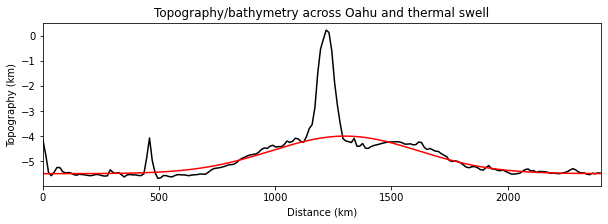

In [76]:
plt.figure(figsize=(10, 3))
plt.plot(hawaii.distance_km, hawaii.topography_km, "-k")
plt.plot(hawaii.distance_km, swell, "-r")
plt.xlim(hawaii.distance_km.min(), hawaii.distance_km.max())
plt.xlabel("Distance (km)")
plt.ylabel("Topography (km)")
plt.title("Topography/bathymetry across Oahu and thermal swell")
plt.show()

Now we can calculate a residual topography and store it in our original `pandas.DataFrame`.

In [77]:
hawaii["residual_topography_km"] = hawaii.topography_km - swell

`hawaii.residual_topography_km` is the data that we're going to try to fit.

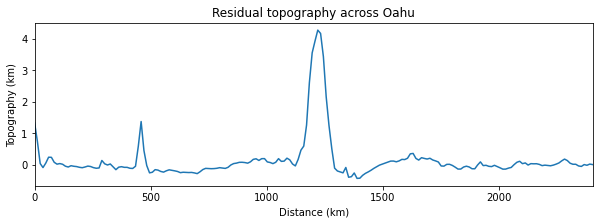

In [78]:
plt.figure(figsize=(10, 3))
plt.plot(hawaii.distance_km, hawaii.residual_topography_km)
plt.xlim(hawaii.distance_km.min(), hawaii.distance_km.max())
plt.xlabel("Distance (km)")
plt.ylabel("Topography (km)")
plt.title("Residual topography across Oahu")
plt.show()

## Estimate the load

Now we can estimate the load as the central part of our profile (the island mass) assuming that it stops at 0.

In [79]:
# Find the indices corresponding to the island load
island = np.logical_and(hawaii.distance_km > 1150, hawaii.distance_km < 1300)

# Create an array with the topography values of just the load
oahu_height = np.zeros_like(hawaii.distance_km)
oahu_height[island] = hawaii.residual_topography_km[island]

# Create an array with the load weight (same equation as before)
oahu_load = - gravity * load_density * oahu_height  # kg/(km.s²)

---

### Your turn

Plot the load height (`oahu_height`) along side the residual topography.

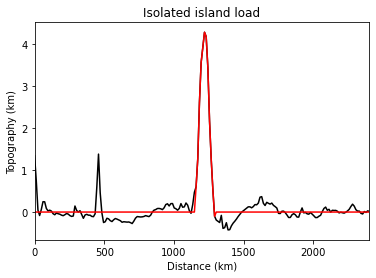

In [80]:
plt.figure()
# Fill in with your own code
plt.plot(hawaii.distance_km, hawaii.residual_topography_km, "-k")
plt.plot(hawaii.distance_km, oahu_height, "-r")
plt.xlim(hawaii.distance_km.min(), hawaii.distance_km.max())
plt.xlabel("Distance (km)")
plt.ylabel("Topography (km)")
plt.title("Isolated island load")
plt.show()

----

In [58]:
number_of_nodes = hawaii.distance_km.size
delta_x = hawaii.distance_km[1] - hawaii.distance_km[0]

# Start with an empty array of the right size
right_hand_side = np.empty(number_of_nodes)

# Populate the part for the flexure equation. 
# The range function generates numbers between the given range in increments of 1.
# Leave the last 4 for later because they are the boundary conditions.
for i in range(0, number_of_nodes - 4):
    # Taken straight from the equations above
    right_hand_side[i] = delta_x**4 * oahu_load[i + 2]
    
# Now add the boundary conditions. 
# Remember that in Python we can index arrays backwards (starting from -1).
right_hand_side[-4 : ] = 0

----

### Your turn

Fill in the code below to create the $\bar{\bar{A}}$ matrix. It will be very similar to the code above.

In [71]:
gravity = 9.8e-3 # km/s²
density_contrast = 3300e9 - 1040e9 # kg/km³
effective_elastic_thickness = 45 # km
young_modulus = 70e12  # kg/(s²km)
poisson_modulus = 0.25  # dimensionless
flexural_rigidity = young_modulus * effective_elastic_thickness**3 / (12 * (1 - poisson_modulus**2))  # kg.km²/s²

In [72]:
# Fill in the shape of the matrix = (number of rows, number of columns)
eq_system = np.zeros((number_of_nodes, number_of_nodes))

# Populate the flexure part of the equation
for i in range(0, number_of_nodes - 4):
    eq_system[i, i] = flexural_rigidity
    eq_system[i, i + 1] = -4*flexural_rigidity
    eq_system[i, i + 2] = 6*flexural_rigidity + delta_x**4 * density_contrast * gravity
    eq_system[i, i + 3] = -4*flexural_rigidity
    eq_system[i, i + 4] = flexural_rigidity
    
# Add the boundary conditions
eq_system[-4, 0] = 1
eq_system[-3, -1] = 1
eq_system[-2, 0] = -1
eq_system[-2, 1] = 1
eq_system[-1, -2] = -1
eq_system[-1, -1] = 1

To check that your matrix is correct, let's estimate the flexure and compare it with a saved solution that I generated.

In [73]:
flexure = np.linalg.solve(eq_system, right_hand_side)

Make a plot of the estimated flexure and compare with the saved figure below.

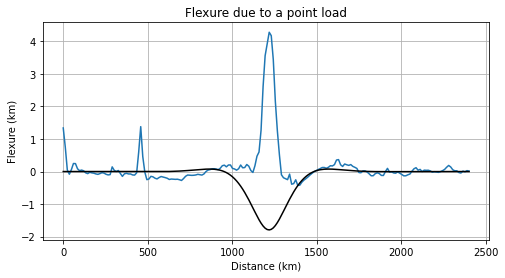

In [74]:
plt.figure(figsize=(8, 4))
# Fill in with your own code
plt.title("Flexure due to a point load")
plt.plot(hawaii.distance_km, hawaii.residual_topography_km)
plt.plot(hawaii.distance_km, flexure, "-k")
plt.grid()
plt.xlabel("Distance (km)")
plt.ylabel("Flexure (km)")
plt.show()